In [2]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# 读取训练集和测试集为 DataFrame
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# 训练集数据
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 测试集数据
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 训练数据集信息
train_data.info()
print '--------------------------------------'
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null o

In [6]:
# 数据清洗，去除 PassengerId、Name、Ticket 字段的值
train_data = train_data.drop(['PassengerId','Name','Ticket'], axis=1)
test_data = test_data.drop(['Name','Ticket'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
# 训练数据存在空数据
train_data.isnull().head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False


** 分析 Embarked 特征对 Survived 的影响 **

S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False


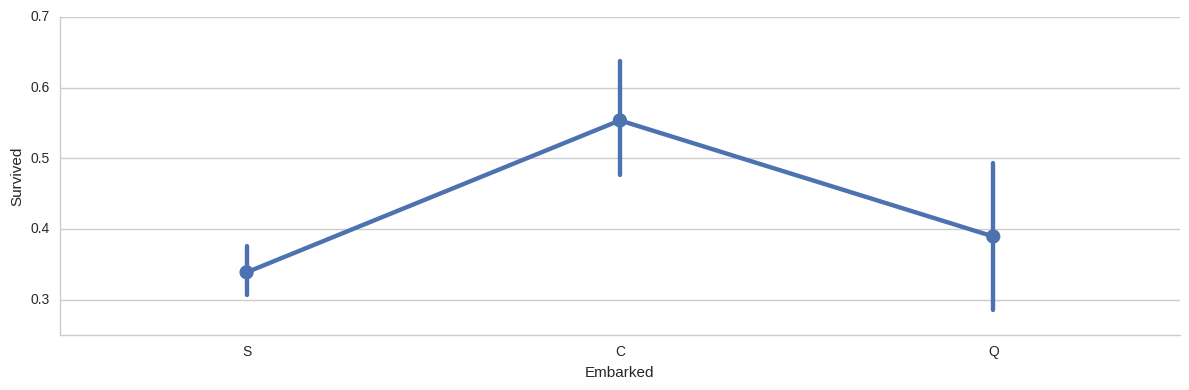

In [8]:
# 对于训练集，讲 Embarked 缺失的数据填充为最多的值 S
print train_data['Embarked'].max()
train_data['Embarked'] = train_data['Embarked'].fillna('S')
# size, aspect 指定绘制图像的大小
sns.factorplot('Embarked','Survived', data=train_data, size=4, aspect=3)
train_data.isnull().head()

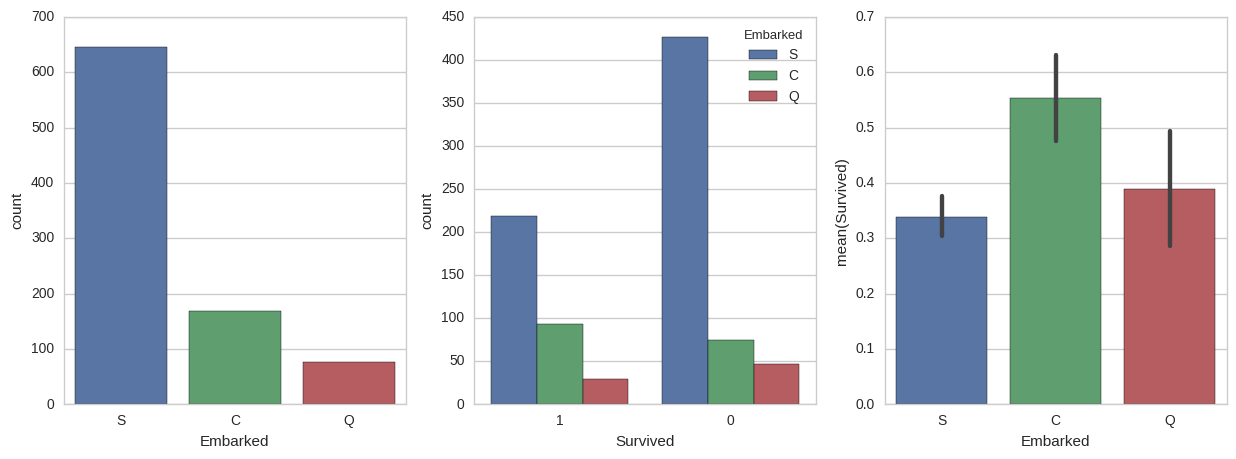

In [9]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=train_data, ax=axis2, order=[1,0])
# 按照 Embarked 分组, 对每组计算 survived 的平均值
embark_perc = train_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=train_data, order=['S','C','Q'], ax=axis3)

由图可以看出，Embarked属性对 Survived 贡献并不明显。

** 分析 Fare 特征对 Survived 的影响 **

In [10]:
# 测试发现 test_data 的数据的 Fare 属性 存在缺失数据,将其填充为训练集的平均值
test_data['Fare'][test_data['Fare'].isnull()]
test_data['Fare'].fillna(train_data['Fare'].mean())
test_data.ix[152]

PassengerId    1044
Pclass            3
Sex            male
Age            60.5
SibSp             0
Parch             0
Fare            NaN
Cabin           NaN
Embarked          S
Name: 152, dtype: object

48.3954076023 66.5969981183
22.1178868852 31.3882065306


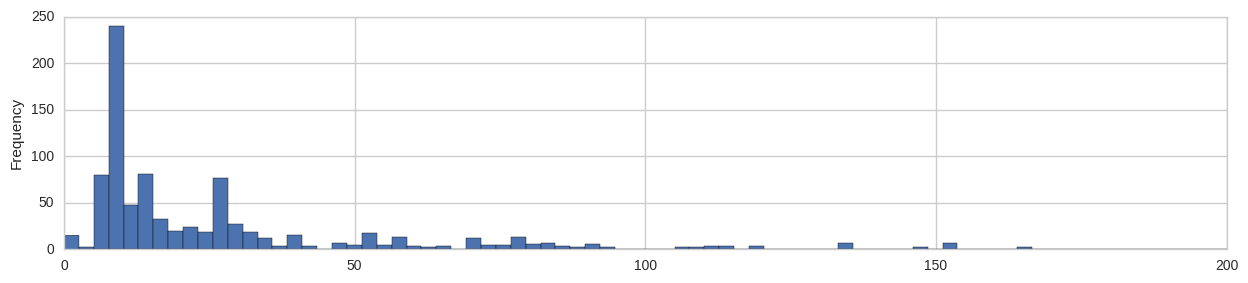

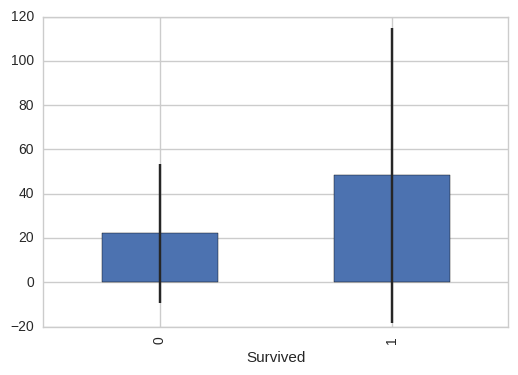

In [11]:
# 获取 survived / not survived 数据中的 Fare 属性的数据
survived_fare_train = train_data['Fare'][train_data['Survived'] == 1]
notsurvived_fare_train = train_data['Fare'][train_data['Survived'] == 0]

avgerage_fare = DataFrame([notsurvived_fare_train.mean(), survived_fare_train.mean()])
std_fare      = DataFrame([notsurvived_fare_train.std(), survived_fare_train.std()])

print survived_fare_train.mean(), survived_fare_train.std()
print notsurvived_fare_train.mean(), notsurvived_fare_train.std()

train_data['Fare'].plot(kind='hist', figsize=(15,3),bins=200, xlim=(0,200))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

由图可以基本看出，Fare 值越大，存活的可能性相对越大，且分布在均值为48，方差为66，正负误差在-19 ～119左右。

** 分析 Age 特征对 Survived 的影响 **

In [12]:
# 测试训练集和测试集的 Age 特征是否存在确实数据
train_data.ix[train_data['Age'].isnull()].head()
test_data.ix[test_data['Age'].isnull()].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
10,902,3,male,NaN,0,0,7.8958,NaN,S
22,914,1,female,NaN,0,0,31.6833,NaN,S
29,921,3,male,NaN,2,0,21.6792,NaN,C
33,925,3,female,NaN,1,2,23.4500,NaN,S
36,928,3,female,NaN,0,0,8.0500,NaN,S


说明训练集和测试集的 Age 特征骏存在确实数据，对于缺失数据，将其填充为高斯分布（mean，std满足训练集分布）的随机值。

/home/sunnymarkliu/software/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sunnymarkliu/software/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


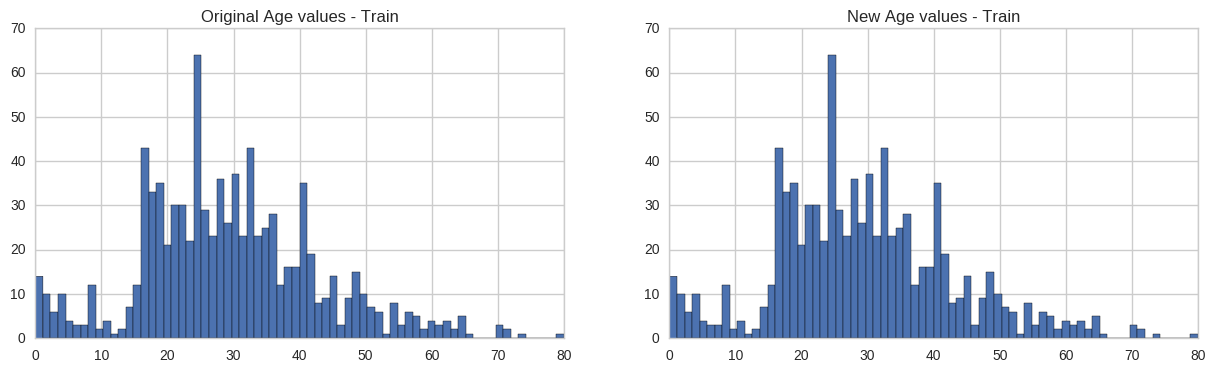

In [23]:
# 计算训练集和测试集年龄的 average, std, NaN 的数目
average_age_train = train_data['Age'].mean()
std_age_train = train_data['Age'].std()
nan_age_count_train = train_data['Age'].isnull().sum()

average_age_test = test_data['Age'].mean()
std_age_test = test_data['Age'].std()
nan_age_count_test = test_data['Age'].isnull().sum()

# 生成高斯分布（mean，std满足训练集分布）的随机值
rand_age_train = np.random.randint(average_age_train-std_age_train, average_age_train+std_age_train, 
                                   size=nan_age_count_train)
rand_age_test = np.random.randint(average_age_test-std_age_test, average_age_test+std_age_test, 
                                   size=nan_age_count_test)

# 绘制原始数据的 Age 特征
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Train')
train_data['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# 对缺失数据进行补全
train_data['Age'][np.isnan(train_data['Age'])] = rand_age_train
test_data['Age'][np.isnan(test_data['Age'])] = rand_age_test
# 绘制补全缺失数据的 Age 特征
axis2.set_title('New Age values - Train')
train_data['Age'].astype(int).hist(bins=70, ax=axis2)


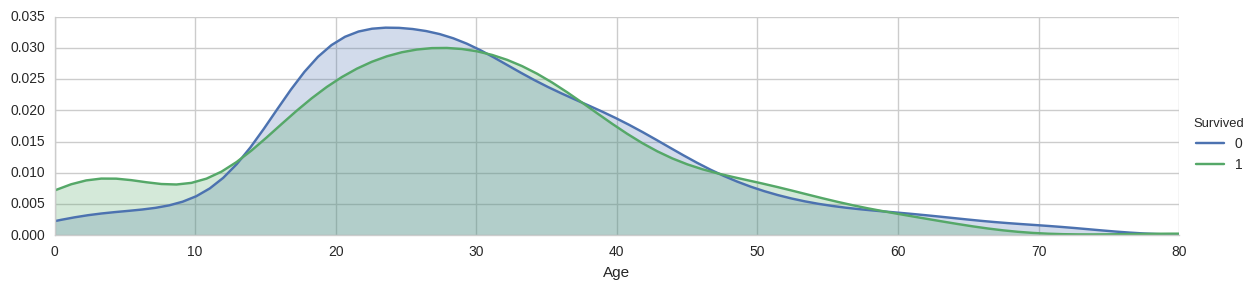

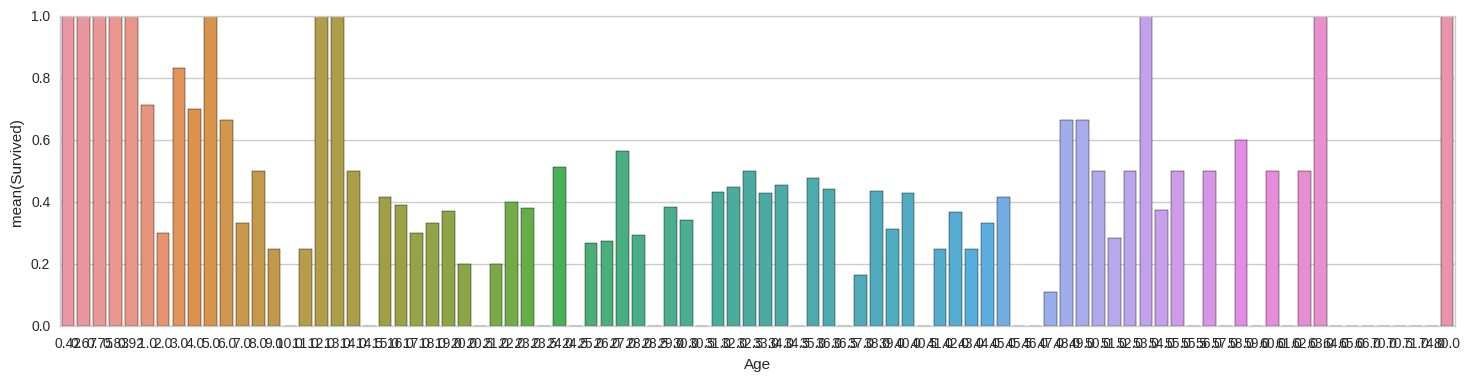

In [32]:
# peaks for survived/not survived passengers by their age， aspect设置绘图的大小
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
# 拟合和绘制一元或二元概率密度分布
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

由图可看出，训练集中 survived / not survived 类型中 Age 的分布近似相同，所以可以猜测 Age 特征对 survived 的贡献不大。

** 分析 Sex 特征对 Survived 的影响 **

In [36]:
# 测试训练集和测试集的 Age 特征是否存在确实数据，测试不存在缺失数据
train_data.ix[train_data['Sex'].isnull()].head()
test_data.ix[test_data['Sex'].isnull()].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


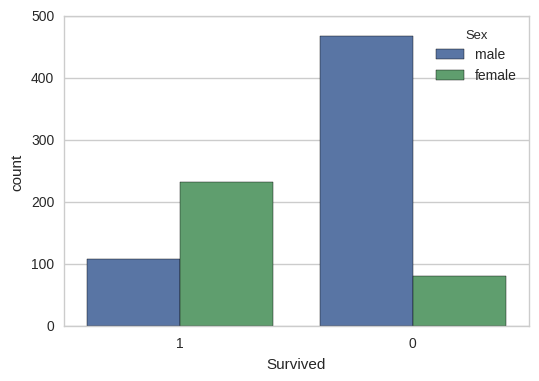

In [39]:
survived_Sex_train = train_data['Sex'][train_data['Survived'] == 1]
notsurvived_Sex_train = train_data['Sex'][train_data['Survived'] == 0]

sns.countplot(x='Survived', hue='Sex', data=train_data, order=[1,0])

可以看出，存活的人中 female 较多，未存活的 male 较多。